<font size=7><b>BME Spring 2025 Final Project: Cart-Pole Data Analysis

Congratulations! We are  now in the final stretch of the class! In this final notebook we wil provide you data recorded from an experiment performed in the lab and you will have the opportunity to work and analyze the real neural tissue activity that occurred over the course of this experiment. This notebook will function as a group project where you along with your team members will take this data along with the basic analysis techniques provided here, and devise your own techniques of analysis. Once you have done this and gathered all the information you can you will be asked to write a final paper explaining your methods and results. You will also be summarizing this paper into a short presentation to be done during our final time. 

<font color="red"><b>Note:</b>This is not necessarily a normal HW, it is supplementary to the final project which you may consider the "Final" for the class, however it is required to be completed to receive full marks for this project. Think of this as showing your work, here you can document all the code used to produce the figures and data used in your project. As such this  is due the same time as your Final Paper, **Thursday (June 12), at 11:59pm**. This is a group assignment so make sure to work together closely with a team of 4-5 people.

In [76]:
%run "cartpole_analysis_source_code.ipynb"
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.10/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Loading: final_analysis_source_code.ipynb...
Creating rate matrices...
Fitting UMAP model...

Running PCA...

Running UMAP
Extracting rewards and pole angles...
Done at: 2025/05/17 22:37:14


<font color="red">**Note :** I highly recommend you go through the source code notebook on top of this one, there is a lot of code there you can draw inspiration from on top of some extra code provided for you that can give you a head start in analysis.

# <font color="red"><u> **IMPORTANT:</u>** </font>Final Project

For the final, we ask you to prepare a short presentation that you will give to the rest of the class on the day of the final. In this presentation go over what occurs in the trial, what were your methods, and encodings/decodings/training signals? How did the organoid react to these, how did its structure and performance change over the course of the experiment? How do you think this structural change affects the performance? These are all good questions to tackle in this project.

This notebook, rather than being a homework, is an environment for you to go through your data and attempt analysis of it, it is essentially scratchwork. Most of your grade for this project are the report and presentation which you will find more information on here :

- [Final Project](https://docs.google.com/document/d/1nVD2sGfwvA2TRIPC3QZh-fpVh9LMcf2BO_Bc9N21-rE/edit?usp=sharing)

However, like with most problems, we ask you to show your work for these projects, so this notebook will be where you submit that. I hope you enjoy working on it, from what I have gone through you have some quite interesting data! 


# Reading Material

You will be required to do extensive analysis on a organoid training dataset. We highly recommend that you read through some of the suggested papers below for inspiration and guidance. Many of these papers are from Potter's lab. He was an early pioneer in MEA stimulation.

General Reading : 
* [Maxwell Device Specs](reading_material/Maxwell_MaxOne_Specs.pdf)
* [Stim Artifact Supression](reading_material/Artifact_Supression.pdf)
* [Stimulation Reference](reading_material/Stimulation_Reference.pdf)
* [Searching for Neural Plasticity](reading_material/Searching_for_Plasticity.pdf)
* [Closed Loop Control of Neural Bursting](reading_material/Tal_Neural_Circuitry.pdf) 

Reading Relevant to Organoid Interfacing :
* [Goal Directed Learing](https://iopscience.iop.org/article/10.1088/1741-2560/5/3/004/pdf) Potter et al.
* [Moving a Robot with Neurons](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) Novellino et al.
* [Learning in Cortical Neurons](https://www.jneurosci.org/content/21/22/8782.full) Shahaf & Marom
* [Computation on Brain Organoids](https://www.nature.com/articles/s41928-023-01069-w) Cai et al.
* [Neurons Play Pong](reading_material/neuronal_pong.pdf) Kagan et al.

# Background: Interfacing With Organoids

Since you havent designed the experiment yourself, this section explains the ways you would generally engage the organoid with. This section mainly serves to give insight into how the experiment you are analyzing the data of was structured.

## Neural Stimulation

The primary way the MEA allows us to interface with an organoid is by sending electrical signals to training neurons that are in said organoid. When the neurons receive these electrical signals it causes them to fire. That is why this process is called **Neural Stimulation**. Making neurons fire over and over again at specific times can permanently change the firing pattern of the neuron. This process is called **Neural Plasticity** or **Synaptic Plasticity**.

### What is a Stimulation Pulse?

A stimulation pulse occurs when we use one of the electrodes on the MEA to change the voltage for a short period of time. This change in voltage only affects neurons in the immediate vicinity of the voltage change. Below is a plot of the most common type of stimulation pulse we use for experiments. This type of pulse is called a **square wave**. We raise the voltage 150mv and then lower it by 150mv, bringing the voltage back to the resting state. In total, this pulse takes 200 μs seconds from start to finish. Note that μs means microseconds, where there are 1000 microseconds in a millisecond. Notice that this pulse resembles the change in mV seen when a  [neuron spikes](https://en.wikipedia.org/wiki/Action_potential).

<p>&nbsp</p>
<center><b> A square Wave plotted over time:

<center>

![SquareWave](/workspaces/WetAI-Final-Project-Spring-2025/.images/Stim_Pulse_downsized.png)

<b>Note:</b> if you would like to see the code used to generate this square wave, the function definition for it can be found in the source code under the section: "Stim Pulses -> Legacy"

You can write the stim pulses we use to train our organoids easily using python code. To do so, you create something called a stim protocol, which in code is essentially a fancy list that our software can parse to send specific pulses through the MEA to the on-chip culture. While you wont need to write stim pulses yourself for this project, it may be interesting to see how to create them.

The stim pulses can be simple, just consisting of one pulse repeating at a frequency of 2Hz, stimulating at 150mv for 100μs: 

[('stim', [0], 150, 100)]


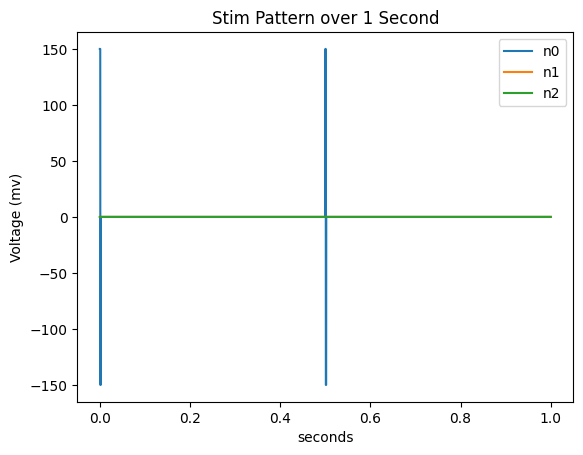

In [77]:
stim_pattern1 = []
stim_pattern1.append(('stim',[0],150,100))

print(stim_pattern1)

signal,t = create_stim_pulse_sequence(stim_pattern1, freq_Hz=2)
plotStimPattern(signal,t)

Or they can be more complex with many patterns within them, stimulating multiple neural units. In this protocol. $n_0$ is stimulated at 100mV for 200μs. We wait 200ms. Then $n_1$ is stimulated at 150mV for 300μs. This protocol is repeated at a frequency of 2Hz, which means that the stim pattern occurs twice a second.

[('stim', [0], 100, 200), ('delay', 200), ('stim', [1], 150, 300)]


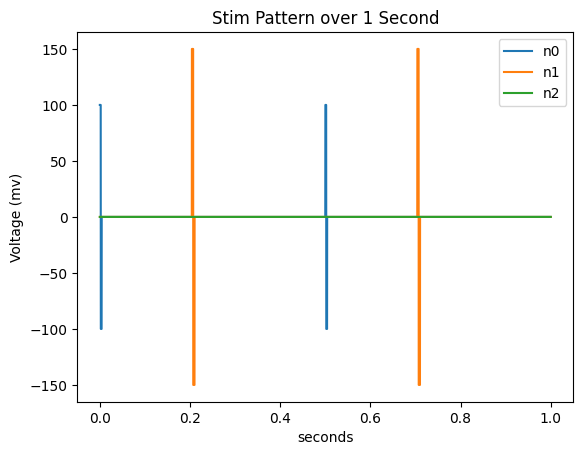

In [78]:
stim_pattern2 = []
stim_pattern2.append(('stim',[0],100,200))
stim_pattern2.append(('delay',200))
stim_pattern2.append(('stim',[1],150,300))

print(stim_pattern2)

signal,t = create_stim_pulse_sequence(stim_pattern2, freq_Hz=2)
plotStimPattern(signal,t)

When creating stimulation protocols, we usually try to avoid protocols with long high voltage pulses or very high frequencies. This will cause the neuron firing in the organoid to tire out, this will not only make the organoid "sluggish", but might also damage it. Because of this we dont typically use voltages over 150 mV and frequencies above 30 Hz, nor overly long stim phases. Generally we want to stay around 10 Hz, but training signals can go higher. 

## Encoding, Decoding, and Training

With cart-pole we are using the processing power of an organoid to control outcomes in an enviroment simulated on the computer. Sending inforation/feedback to and reading from the organoid is a very complicated process but it's important to familiarize yourself with the ways to do this. Here we provide a very high-level look at how to communicate with the organoid.

### Encoding

To tell the organoid what is happening in the simulated environment on the computer, we need a way for the organoid to receive data from the cart-pole game. How can we send digital data to an organoid and have that affect the electrophysiological signals? Through encoding it with stimulation pulses. The [Novellino et al. paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) provides a good summary of how they encoded data in their methods section. Please make sure your group has read this before continuing, focusing on how they translate data into motor commands.

There are multiple ways we could go about encoding data for the organoid, here are two examples:

1. <b> Rate Encoding: </b> Rate encoding is the process of sending information using a stimulated firing rate. Sending a stim pulse at a specific frequency could be read by a neuron in the organoid and that frequency would hold the information we'd want to send it. For the cart-pole simulation, we could take an angle between [-14, 14] degrees and convert it to stimulations at a rate between [0,10] Hz to a single neuron. You could also send different aspects of the data through multiple neurons, you could imagine how it perhaps would be better to encode [-14, 0] for neuron A between [0,10] Hz, and [0,14] -> [0,10] Hz to neuron B.

2. <b> Spatial Encoding: </b> Perhaps instead of firing rate of the neuron, we use 3 separate neurons to encode information. For cart-pole, Neuron A could signal that the pole is leaning to one side, Neuron B could signal it being centered, and Neuron C could signal leaning to the other side. From the lectures with Professor Turner-Evans we saw how the fruit flies encode their head angle using a spiral of neurons, each neuron encoding a position, this would be a form of spatial encoding!

Here is the peusdocode for an example encoding function :

<pre>
if food_signal is under 0.5  :
    stim organoid at ( food_signal * 5 ) Hz
else :
    stim organoid at 10 Hz



### Decoding

Encoding through stimulations allows us to send the organoid information, however our culture won't send stimulation pulses back in response, so we must find another way to get information "off" the organoid. This process is decoding, we need to work based on the spiking behavior in the organoid. When decoding you want to be able to translate spike counts and spike rates into movement. One could have neuron A's spike count decode to the distance for the mouse to move forward and neuron B's for strafing distances for an example and a high spike count in a neuron translates to moving the a long distance in associated direction, perhaps there is a threshold of spike counts under which you move right and over which you move left. You could sum the number of spikes on one neuron or the other, or take a moving average.

### Training

 Last homework we had you work on reinforcement learning. Training the organoid uses many of the principals you learned in that homework. In training, we can use the feedback we send the organoid to actually change its circuitry in real time, not just incrementally tell it if it's doing good or bad, although it can alo be used to do that. For this experiment you are given datasets trained with three specific protocols `Adaptive`, `random`, and `none`.

# <font color="green"> Experiment

# An explanation of the data

First, to see how the data is loaded in from the pickle files. Make sure to look at the `Loading Data` section of the source code notebook.

## Metadata explained

The metadata is a dict with the following keys: 
* `'mapping'`: mapping                        $\implies$ pd dataframe mapping of the channels/electrodes to positions
* `'fs'`: fs                                  $\implies$ The sampling frequency
* `'stim_electrodes'`: stim_electrodes        $\implies$ The electrodes that were stimulated
* `'stim_inds'`: stim_inds                    $\implies$ The indices of the stimulated electrodes
* `'encode_electrodes'`: encode_electrodes    $\implies$ The electrodes that were used to stimulate in information
* `'encode_inds'`: encode_inds                $\implies$ The corresponding indices of the encode electrodes
* `'decode_electrodes'`: decode_electrodes    $\implies$ The electrodes that were used to decode information
* `'training_electrodes'`: training_electrodes $\implies$ The electrodes that were used to train the model
* `'training_inds'`: training_inds            $\implies$ The corresponding indices of the training electrodes
* `'spike_channels'`: spike_channels          $\implies$ List of arrays of channels for each sorted neuron
* `'spike_locs'`: spike_locs                  $\implies$ x,y position of each sorted neuron

In [79]:
print(type(metadata))
print(metadata.keys())

<class 'dict'>
dict_keys(['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs'])


The metadata has lots of important information, for example it has the location of the spikesorted electrodes

In [80]:
metadata['mapping'].head(5)

,channel,electrode,x,y
0,0,18598,2065.0,1470.0
1,1,20644,3220.0,1627.5
2,2,19040,2100.0,1505.0
3,3,21723,2852.5,1715.0
4,4,14939,3482.5,1172.5


The sampling frequency

In [81]:
print(metadata['fs'])

20000


Which electrodes are **stim**, **training**, **encoding**, and **decoding**

In [82]:
print(metadata['stim_electrodes'])
print(metadata['encode_electrodes'])
print(metadata['decode_electrodes'])
print(metadata['training_electrodes'])

[23275, 24768, 22182, 23923, 909, 3229, 17335, 25039]
[23275, 25039]
[18429, 18385]
[24768, 22182, 23923, 909, 3229, 17335]


The data for spike raster and spike locations

In [83]:
# print first 10
print(metadata['spike_locs'][0:10])
# print length
print(len(metadata['spike_locs']))

[[2065.  1470. ]
 [2065.  1470. ]
 [2100.  1505. ]
 [3185.  1662.5]
 [3185.  1662.5]
 [3185.  1662.5]
 [3150.  1557.5]
 [3150.  1575. ]
 [3150.  1575. ]
 [3150.  1785. ]]
108


## Spiking Data Explained


The spiking data (sd) the following: 
* `baseline_sd`          $\implies$ The SpikeData object for the baseline recording
* `adaptive_sd`          $\implies$ The SpikeData object for the adaptive recording
* `random_sd`            $\implies$ The SpikeData object for the random recording
* `none_sd`              $\implies$ The SpikeData object for the none recording

For more info about the SpikeData class: https://github.com/braingeneers/SpikeData

We learned in a previous electrophysiology homework we can easily get and plot the STTC from a spikedata class:

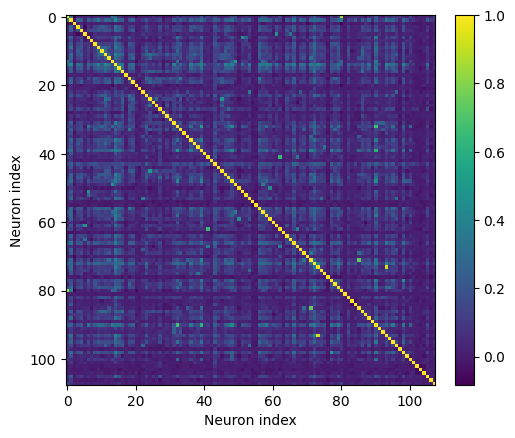

In [84]:
STTC_plot(baseline_sd)

## Logs:

* ( Baseline has no logs )
* Logs has the keys ['game', 'reward', 'log', 'pattern']
* Each of the values from these keys is a pandas dataframe with the following columns:

Logs is a dict with the keys:
* `'game'`: `['time','pole_angle', 'reward', 'action', 'x', 'xdot', 'theta', 'thetadot']` # This is the game log
* `'reward'`: `['time', 'episode','reward']` # This is the reward log
* `'log'`: `['time', 'amplitude', 'duty_time_ms', 'stim_electrodes', 'tag', 'stim_pattern']` # This is the stim log
* `'pattern'`: `['pattern', 'time', 'stim_indices']` # This is the training stimulus log

In [85]:
print(type(adaptive_logs))

<class 'dict'>


This is the log of the cartpole game state over time

In [86]:
adaptive_logs['game'].head(5)

,time,pole_angle,action,x,xdot,theta,thetadot
0,0.214106,-0.020200,1.0000,-0.040879,0.187582,-0.020200,-0.300026
1,0.416450,-0.026201,1.0000,-0.037127,0.382986,-0.026201,-0.599010
2,0.620427,-0.038181,1.0000,-0.029468,0.578465,-0.038181,-0.899830
3,0.822734,-0.056178,-0.8832,-0.017898,0.406668,-0.056178,-0.653545
4,1.025152,-0.069249,1.0000,-0.009765,0.602526,-0.069249,-0.963375


This is the log of the reward over time

In [87]:
adaptive_logs['reward'].head(5)

,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0


In a previous homework we learned to plot the rewards over time

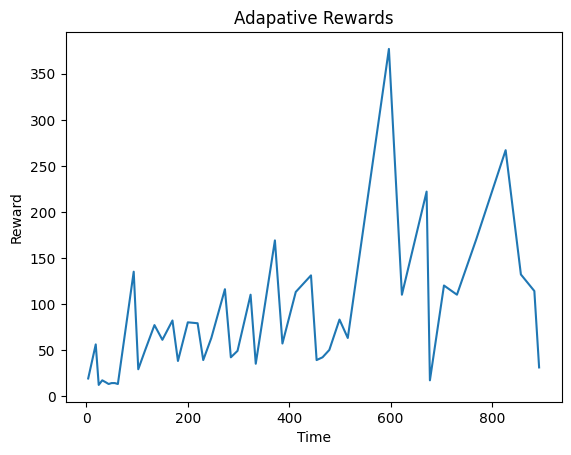

In [88]:
plt.plot(adaptive_logs['reward']['time'], adaptive_logs['reward']['reward'])
plt.xlabel('Time')
plt.ylabel('Reward')
plt.title('Adapative Rewards')
plt.show()

This is the log of the stimulus over time

In [89]:
adaptive_logs['log'].head(5)

,time,amplitude,duty_time_ms,stim_electrodes,tag,stim_pattern
0,0.96075,400,200,"[23275, 25039]",sensory,"(23275, 25039)"
1,1.53725,400,200,[23275],sensory,"(23275,)"
2,1.96070,400,200,[23275],sensory,"(23275,)"
3,2.28165,400,200,[23275],sensory,"(23275,)"
4,2.56130,400,200,[23275],sensory,"(23275,)"


This is the log of the reward to which stimulus indices over time

In [90]:
adaptive_logs['pattern'].head(5)

,time,reward,stim_indices
0,3.911506,19.0,"[4, 3]"
1,4.019525,19.0,"[4, 3]"
2,4.128859,19.0,"[4, 3]"
3,4.237211,19.0,"[4, 3]"
4,18.771035,56.0,"[6, 5]"


## Architecture of the MEA & our Culture

### Multi Electrode Arrays

To gather data and interface with the organoids we are using the device you explored in the Electrophysiology homework, the CMOS multi electrode array provided by Maxwell Biosystems. Specifically, Prof. Tal Sharf used the, [Maxwell Biosystems, Maxone MEA](https://www.mxwbio.com/technology/?gclid=Cj0KCQjwr82iBhCuARIsAO0EAZw9HkpNG65Ot-iM4ZKitSkEYj4utIb3EXS6lGWZbp6G9ABrDn2UChEaAsy8EALw_wcB) to perform his Diazepam experiment. [Maxwell has a brochure](http://54.183.203.115:8888/files/work/Experiment/reading_material/Maxwell_Organoids.pdf) summarizing organoid experiments on the MaxOne.

For our experiment, there is a small rectangular surface on the MaxOne where we place our organoid. The surface of the MaxOne chip contains over 20,0000 electrodes. From this, we can select about 1,000 electrodes to record from for the experiment. The electrophysiologist running the experiment carefully selects which electrodes they want to record from. Specifically, they want to choose electrodes that are touching the neural tissue, so that they can record as much neural activity as possible. Below is the electrode layout for our cart-pole experiment. 

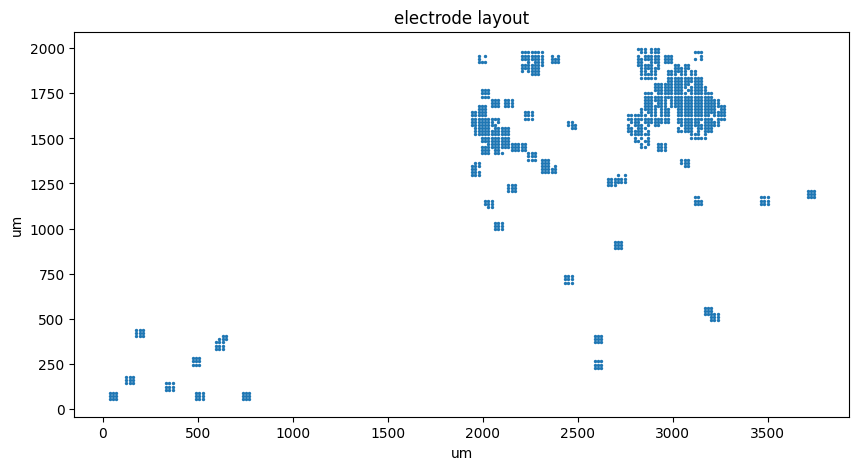

In [91]:
electrodeLayout()

For now this mapping simply shows the electrodes that have been chosen for this specific experiment, without the neural units plotted over them. We are able to record activity from the neural tissue directly over the highlighted portions of the array (shown in blue).

Using the information found in `metadata`, we can plot the electrodes used to encode, decode, and train during the experiment onto the previous MEA map. Before running our experiment, we selected the below locations to stimulate to/read from the organoid. 

108
Generating Electrode Role Plot...


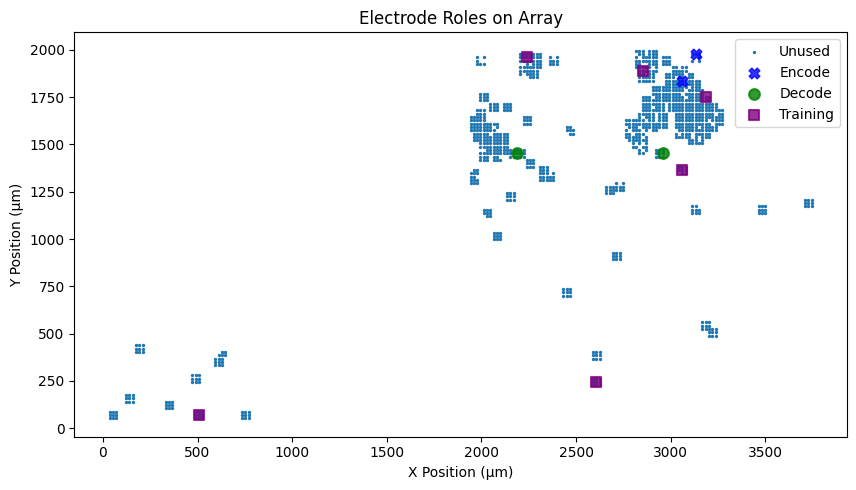

In [92]:
Architecture_Map()

### Spike Sorting and  Neural Units

In a previous homework you were provided a Spike Raster, a matrix which tells you at what moment each neuron fires. How do we go from talking about raw signals recorded from 1,000 electrodes, to the spiking times of some 100 neurons? The complicated question is an active area of research in neuroscience called [spike sorting](http://www.scholarpedia.org/article/Spike_sorting). There is a [great video](https://en.wikipedia.org/wiki/Spike_sorting) on wikipedia about spikesorting. Spikesorting doesn't yet produce perfect results, so scientists still have to manually curate results. We don't actually know if the results from spikesorting are truly individual neurons (They are mostly but not always, the tech is far from perfect). For this reason, the outputted "neurons" from spikesorting are usually called **putative neurons** or **neural units**.

<p>&nbsp</p>

<center><b>Spike Sorting Diagram</b>

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S0361923015000684-gr1.jpg)

Below we see the same electrode layout as before, but this time there are red dots on it. These red dots are the places where a spikesorting algorithm believes neurons are located.

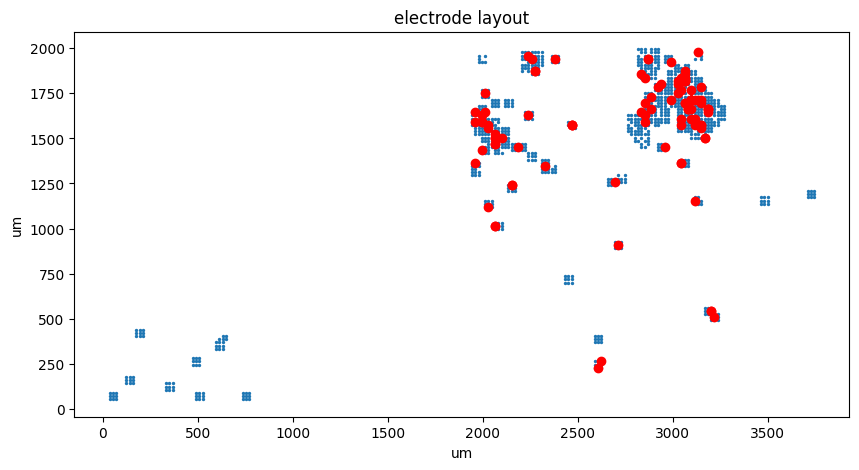

In [93]:
neuronLayout(baseline_sd)

You are provided the spikesorted data for you to plot out, <font color="red"><b>you do not have to do the sorting yourself</b></font>. Generally speaking, different spans of time in an experiment result in different neural units being shown, this is because their behaviour has changed throughout the course of the experiment, the neurons in the organoid will have their firing patterns changed which could result in different neural units being classified by the sorting process. However, the for our case we are using a spikesorting done through all phases of the experiment so we only have one map of the dataset's neural units.

Bringing it all together we have the final plot, here we see the neural units and marked stim electrodes. You'll notice the locations of the neural units might not line up exactly with the decode/encode/training channels, this is because the spike sorting processes determines significant units based on behaviour. This discrepancy does not mean that we misplaced our channels, units located on or around the encode/decode/training channels are likely still read from/affected by our MEA. 

108
Generating Electrode Role Plot...


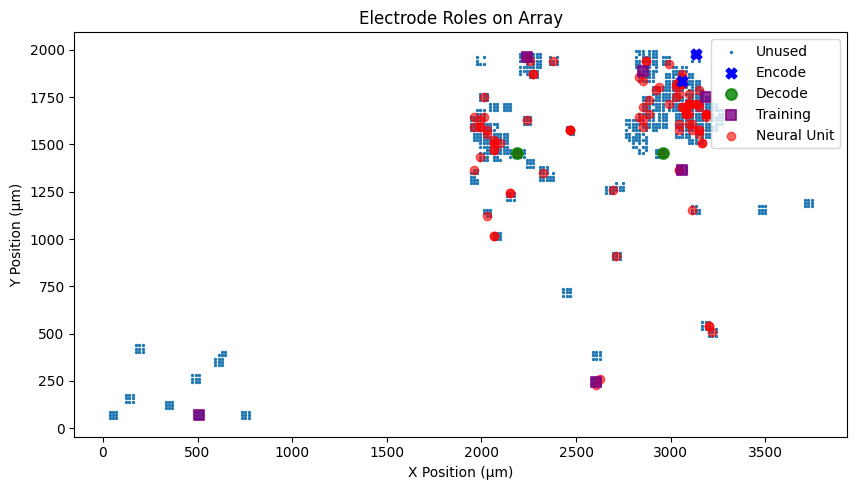

In [94]:
Combined_Map()

# <font color="green">Analysis

Let's familiarize yourself with the ways we can collect information from the experiment. In this part of the notebook, we will go into detail about the methods you will be using throughout the procedure and in your final writeup. 

While you read through this section, as a group, try to think about interesting ways you can use these tools to get some unique insight on the data we'll collect from the organoid recording. Are there ways to combine these tools to produce something new? A good tip is to look at the source code of the notebook and see how we find this information so you can modify it to your needs later.

Data visualization is also important, in this section we show that you can plot the STTC matrix on a graph of the organoid. What are some other metrics we could try plotting?  Also, think about what an anomaly in the data you receive might look like and what it could mean.


Select the Spike-dataset you want to work on with the following function, this will save the selected dataset in the python variable `sd_main`. Feel free to use more just this single main Spike-dataset, you may want to compare two different recordings, but this does to give you a simple way to load the data. We recomnend you look through the source code file for more customisable ways to load the data.

In [95]:
interact_manual( dataSelect, sd_name=datasets )

interactive(children=(Dropdown(description='sd_name', options=('Baseline', 'Dataset 6', 'Dataset 7', 'Dataset …

<function __main__.dataSelect(sd_name)>

To get you started, we've provided the basic methods of data analysis you learned throughout the previous homeworks. Look through these plots for an initial pass of the data and make sure to mention any findings from here you see as important in your final report, however using only these analysis techniques for your final project will not result in full marks. 

## STTC

In the Electrophysiology HW we learned how the Spike Time Tiling Coefficient (STTC) is a measure that is similar to correlation, except with values from [0,1] instead of [-1,1]. It tells us the degree to which two neurons fire together. It represents connectivity between neuron pairs across the organoid. We can use the information from the matrix to understand the degree to which information is communicated across an organoid. 

Below is a simple interactive graphic that considers this question. In the left graph, a line is drawn between all pairs of neural units whose STTC is above some threshold. The right graph is almost the standard STTC matrix, but it displays only STTC values that are above the threshold. Notice that as you increase the threshold that the STTC must be above, the number of lines disappear from the graph. Notice also that the lines between the two organoids disappear first (threshold
$\approx$
0.5), and then, later, disappear between neurons within the same organoid (threshold 
$\approx$
 0.8). This makes logical sense. We expect there to be stronger communication between neurons that are close to each other, inside the same organoid. Neurons that are in two different organoids most likely have weaker communication between each other.

 $$
\textbf{IF:}\:\text{STTC}_{i,j}>\text{threshold},\quad\textbf{THEN:}\:\text{DrawLine}_{i,j} \quad \forall i,j\in\{\text{selected neurons}\}
$$

In [96]:
interact_manual( sttcLayout, threshold=(0,1,.1) )

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), Button(description='Run Intera…

<function __main__.sttcLayout(threshold)>

## Latencies

Using the STTC we learned a way to measure the degree to which neurons fire together. But is there actually any degree of communication between the neurons? One way to parse out this question is to see if one neuron consistently fires before the other. This is done by using a measurement called **spike time latency**, or latencies for short. 

Suppose we want to calculate the latency between some spike on a neuron ($n_1$) compared to another neuron ($n_2$). The latency is calculated by measuring the duration of time in between the spike of $n_1$ and the closest occuring spike from $n_2$. If the $n_1$ spike occurs before the $n_2$ spike this distance is positive, otherwise, the distance is negative. Doing this for all the spikes of $n_1$ we can create a histogram of the latencies between two neurons. if the histogram has mostly positive values, or mostly negative values, then we have a general notion of the direction of "information flow".

The interactive graphic below plots a histogram of the latencies between any two neural units. Try running the widget using the dataset `baseline` with $n_1=48$ and $n_2=38$. Notice that these two neurons that are located close to each other have latencies that are skewed negatively. Now make $n_1=38$ and $n_2=48$. Notice that the latencies are now skewed positively.

In [97]:
interact_manual( latencyPlots, neuron1=(0,sd_main.N-1), neuron2=(0,sd_main.N-1) )

interactive(children=(IntSlider(value=53, description='neuron1', max=107), IntSlider(value=53, description='ne…

<function __main__.latencyPlots(neuron1, neuron2)>

## Supplementary Basic Analysis

Along with the methods we just went over, we have provided you code in `cartpole_analysis_source_code.ipynb` to use the techniques taught to you in the electrophysiology homework. This functions include plotting the <u>**spike raster**</u>, where `L1` dictates the start time and `L2` the end time, and if `analyze` is true it will also plot the population firing rate over the raster:

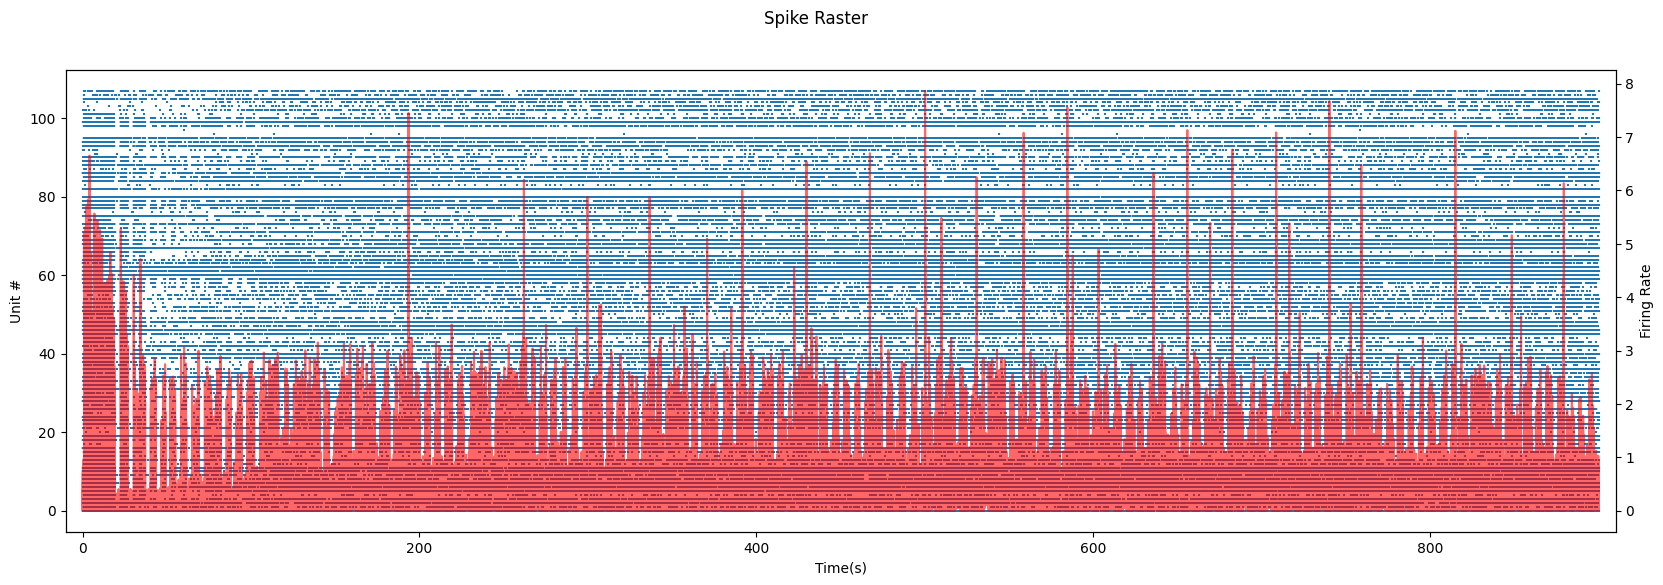

In [98]:
plot_raster_pretty(sd_main, l1 = -10, l2=sd_main.length/1000 + 10, analyze=True)

And the interspike interval:

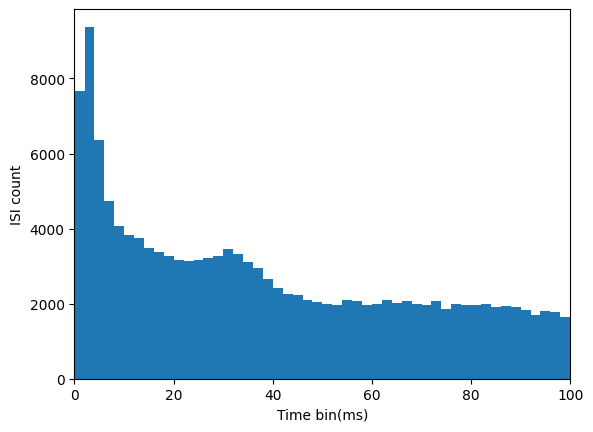

In [99]:
interspike(sd_main)

Along with others `correlation_plot`, `STTC_plot`, `calculate_mean_firing_rates` along with a Bonus section filled with other functions that you need to use as groundwork for your own data visualization techniques. 

# Dimensional Reductions:
One powerful technique for understanding the internal representations of the organoid is dimensionality reduction. This involves reducing the original 108-dimensional neuronal data to just 2 dimensions, enabling visualization while attempting to preserve the geometric or structural relationships in the data — such as clusters, distances, or trajectories. As an example we provide functions that use a combination of PCA and UMAP to plot the neuronal embeddings over time and the neural trajectories. We won't explain these techniques here, but feel free to learn more about them with the resources below:

PCA Resources
* [StatQuest: PCA main ideas in only 5 minutes!!!](https://youtu.be/HMOI_lkzW08?si=NHCAgiJDuFFgpY2Z)
* [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://youtu.be/FgakZw6K1QQ?si=7CcvBddOLDmYJ2XW)

UMAP Resources
* [StatQuest: UMAP Dimension Reduction, Main Ideas!!!](https://youtu.be/eN0wFzBA4Sc?si=1YjNfbPF_2K34kkr)
* [StatQuest: UMAP: Mathematical Details (clearly explained!!!)](https://youtu.be/jth4kEvJ3P8?si=m63B8_4QF7g1rKKf)

Comparing UMAP vs. t-SNE vs. PCA
* [Deepia: Latent Space Visualisation: PCA, t-SNE, UMAP | Deep Learning Animated](https://youtu.be/o_cAOa5fMhE?si=YCpAmBQdwQRJzHcd)


Here are the functions to create static versions of these plots: `umap_embeddings_rewards`, `umap_trajectory_rewards`, `umap_embeddings_angle`. Which plot the data using a UMAP model fitted to all 3 datasets of adaptive, reward, and none. Note that trajectories are the lines between subsequent embeddings.

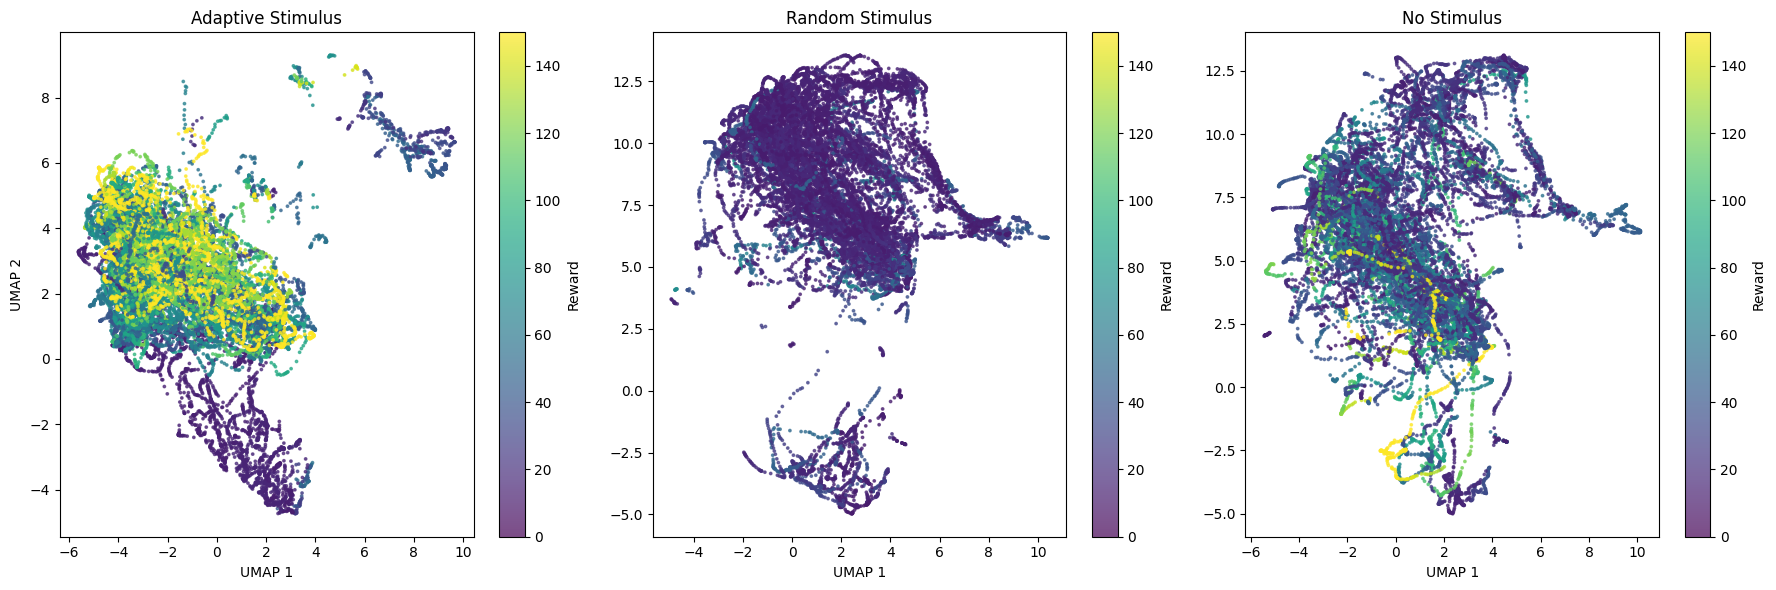

In [100]:
umap_embeddings_rewards()

To get a better understanding of what these plots mean you should view what the embeddings look like animated through time. Over time the shape of the neural embeddings change and the reward and pole angle should get better if the organoid is learning to balance the cart pole.

 
(Note: Running the function to create the animation will take a while)

In [101]:
# umap_trajectory_rewards_anim()

Ideas for more experiments with UMAP:
* What if we didn't use any PCA?
* Instead of reducing it down to 2D, reduce it down to 3D and create plots and animations of the landscape chaging over time in 3D
    * 3D Plotting in matplotlib: https://matplotlib.org/stable/gallery/mplot3d/index.html
    * Animations in matplotlib: https://matplotlib.org/stable/users/explain/animations/animations.html 
    * Subplots in matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 
* Instead of using a UMAP model fitted on combined data, visualize the datasets that are learning with a UMAP fitted specifically on that dataset

## Principal Component Analysis & Eigenvector Mapping

In a previous homework, we delved into the subject of the correlation and Spike Time Tiling Coefficient matrices. These can be useful tools to understanding the relationships of the neurons in the culture, specifically how they act together in unison. However when looking at these matrices It can be somewhat difficult to glean specific structures from them, but them being matrices, diagonal matrices to be specific, allows us to harness an important aspect of linear algebra to simplify their information. 

As discussed in class, the eigenvectors of a matrix represent the axes upon which the matrix's tranform operate, with the corresponding eigenvalue being the degree to which that transform is performed. The eigenvectors span a vector space known as the eigenspace, the subspace where the matrix  affects another vector, by streching or compressing the vector with respects to the matrix's eigenvalues. This means certain axes, therefore eigenvectors, contribute more to the transformation then others, since their eigenvalues affect the system to a greater degree. From this we can decompose any diagonalizable matrix into it's set of eigenvectors, select the eigenvectors that affect this space the most and reconstruct a pretty close aproximation to the matrix using only those, and therefore fewer, elements. This simplification allows us to understand the matrix through a lower dimension. Because our correlation and STTC matrices are symmetric, we can easily get their eigenvalues and eigenvectors with the following functions.

/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/srv/conda/envs/notebook/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


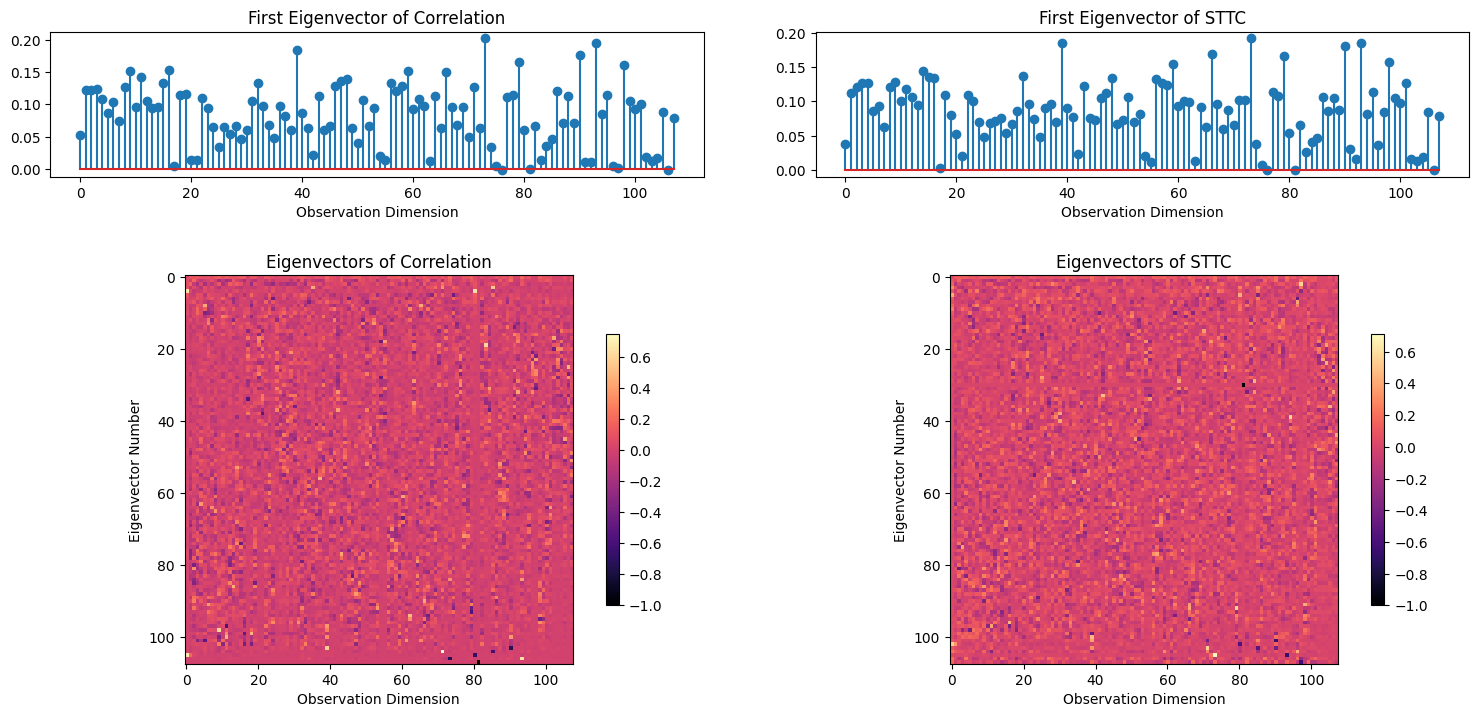

In [102]:
Corr = correlation(sd_main)
STTC = get_sttc(sd_main)

Wcorr, Ucorr = eigenvalues_eigenvectors(Corr)
Wsttc, Usttc = eigenvalues_eigenvectors(STTC)

EigenvectorAnalysis(Ucorr, Usttc)

By default, in the matrices you see above, each column is an eigenvector of the coresponding correlation metric, these are already sorted by eigenvalue, so we see the first column is the most important or principal eignevector. Let's take a coloser look at these eigenvectors, in the plot below, select the metric you want to compare and you will be show the first five most important eigenvectors for either the correlation or STTC matrix:

In [103]:
interact_manual( plot_basis, method=method_options)

interactive(children=(Dropdown(description='method', options=('Correlation', 'Spike Time Tiling'), value='Corr…

<function __main__.plot_basis(method)>

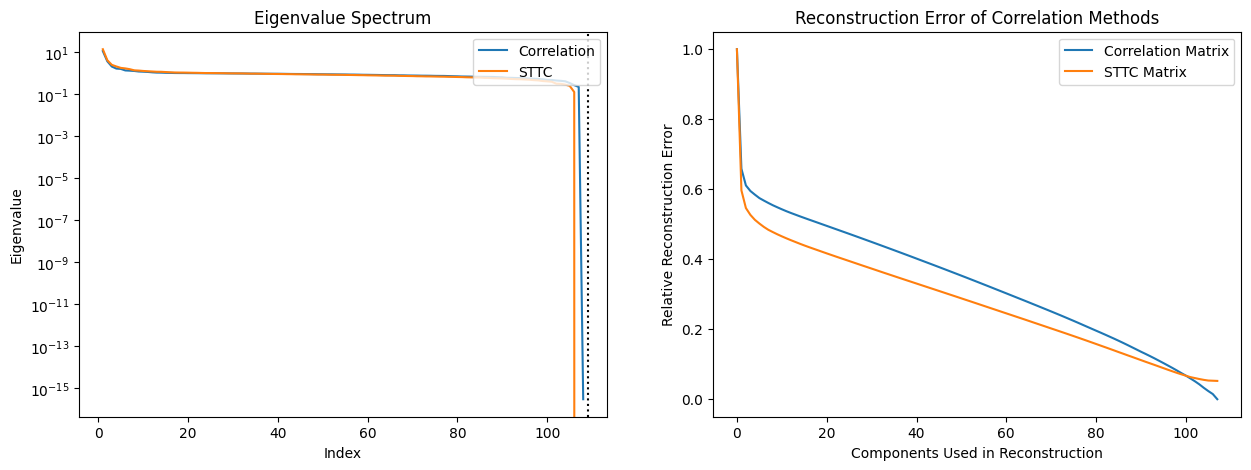

In [104]:
ReconstructPlots(Wcorr, Wsttc, Corr, STTC)

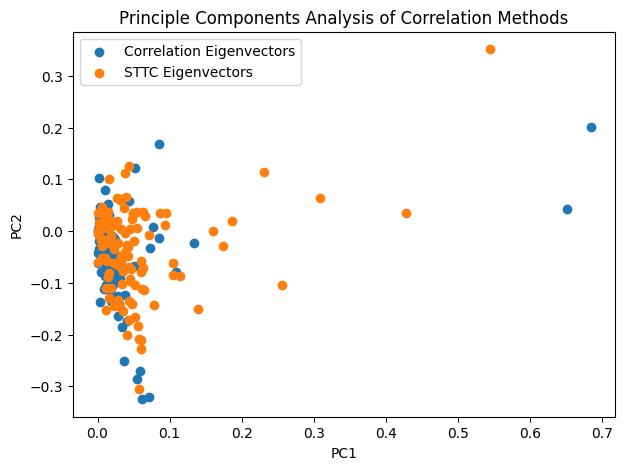

In [105]:
PCAplots(Ucorr, Usttc)

In [106]:
interact_manual(EigenvectorLayout, Method=method_options)

interactive(children=(Dropdown(description='Method', options=('Correlation', 'Spike Time Tiling'), value='Corr…

<function __main__.EigenvectorLayout(Method)>

# Questions to Consider

When doing your analysis, please remember to refer to the [final project summary](https://docs.google.com/document/d/1B0JPPlQ4dgkSrA47y6ITRCN_mMGhs9j-bRhvImF1cIA/edit?usp=sharing) we released. Below are some questions that may help guide the direction of your analysis.

* Nearly every proper biology experiment is set up to have a control sample that you compare your test sample to. In this case, what is your control? Is it the recording before stimulation? Is it the organoid that was never stimulated? (Hint: you can have multiple different controls) 
* Were you able to spot any bursts either before or after stimulation? Did the burst pattern change after stimulation?
* The rows of the spike raster (corresponding to neural units) are not lined up between the different recordings. Can you locate the raster for an individual neuron across different recordings? How does this individual neuron's behavior change pre vs post stimulation? The Neurons on the CC matrix however are kept the same throughout the process, are there any changes in behavior there? 
* In the game logs, is there any obvious change in behavior patterns in how the mouse moves/orients itself/collects rewards. Are there any events that occur in these logs that could point to behavior change? Does it seem that the train signal changes responses or does simply playing the game over time do we see a shift? 
* Did the organoid get better or worse at playing the game throughout the trial? Either result is significant, don't be shy to record poor performance. Remember it's not about how well your organoid performed, but if/how it changed over time. 
* Do you see new connections being made in the organoid before/after the trial is conducted? Do you see any old connections pruned? Do you see a completely new framework of reactivity in your organoid, if so why do you think that happend? 
* Are there clear chains of information flow across the organoid? If so, how do you think you could visualize that? Try to consider the various plots you might need to make for your paper/presentation. 
* Are there any papers, who conducted a similar experiment and got similar results? Did they get different ones? If they're different what could have caused the differences? 

# <font color="red">Your Analysis Code (15 pts for Code)

<font color="red"> We expect you to keep a record of all the code you used for analysis inside of this repository, `Final_Project_Spring2025`. We recommend putting all your code below, however, you're allowed to break your code up into different notebooks/python files if you like. Please make sure your code is well documented and runs properly. It should contain numerous comments explaining what each piece does as well as instructions on how to run the code (if not obvious). **You will be graded on the cleanliness and runnability of the code** you submit for your final project. It's only necessary to record the code used to create figures/tables in your paper or presentation. Other exploratory code can be deleted, however, feel free to keep it if you're proud of it.